<a href="https://colab.research.google.com/github/bchanyoo/NLP/blob/main/NLP%20Wikidocs_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import re
import urllib.request
import zipfile
from lxml import etree
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [10]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/ukairia777/tensorflow-nlp-tutorial/main/09.%20Word%20Embedding/dataset/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7e624bd8aec0>)

In [11]:
#해당 파일 전처리

targetXML = open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)

# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]


In [12]:
print('총 샘플의 갯수 : {}'.format(len(result)))

총 샘플의 갯수 : 273424


In [13]:
for line in result[:3]:
  print(line)

['here', 'are', 'two', 'reasons', 'companies', 'fail', 'they', 'only', 'do', 'more', 'of', 'the', 'same', 'or', 'they', 'only', 'do', 'what', 's', 'new']
['to', 'me', 'the', 'real', 'real', 'solution', 'to', 'quality', 'growth', 'is', 'figuring', 'out', 'the', 'balance', 'between', 'two', 'activities', 'exploration', 'and', 'exploitation']
['both', 'are', 'necessary', 'but', 'it', 'can', 'be', 'too', 'much', 'of', 'a', 'good', 'thing']


In [14]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

model = Word2Vec(sentences=result, vector_size=100, window=5, min_count=5, workers=4, sg=0)

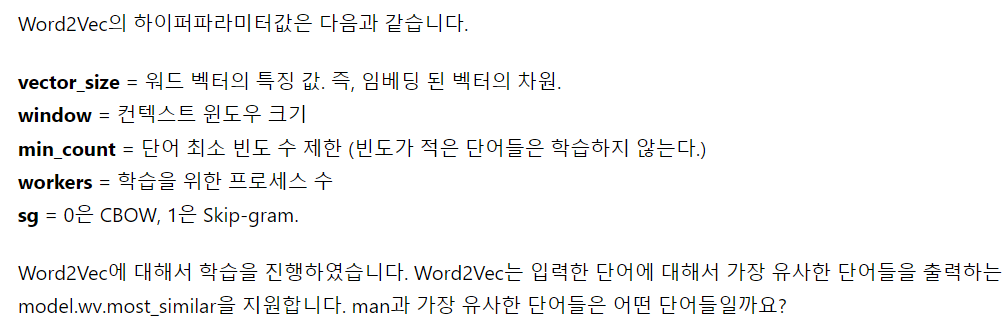


In [15]:
#가장 유사한 단어 찾기
model_result = model.wv.most_similar('man')
print(model_result)

[('woman', 0.8444675207138062), ('guy', 0.8227318525314331), ('boy', 0.7787885665893555), ('lady', 0.7781490683555603), ('girl', 0.759558379650116), ('soldier', 0.7226320505142212), ('gentleman', 0.7142181396484375), ('kid', 0.6984475255012512), ('david', 0.6732662916183472), ('poet', 0.6686967611312866)]


In [18]:
model.wv.save_word2vec_format('eng_w2v') #모델 저장
loaded_model = KeyedVectors.load_word2vec_format('eng_w2v') #모델 로드하기

In [19]:
model_result = loaded_model.most_similar('man')
print(model_result)

[('woman', 0.8444675207138062), ('guy', 0.8227318525314331), ('boy', 0.7787885665893555), ('lady', 0.7781490683555603), ('girl', 0.759558379650116), ('soldier', 0.7226320505142212), ('gentleman', 0.7142181396484375), ('kid', 0.6984475255012512), ('david', 0.6732662916183472), ('poet', 0.6686967611312866)]


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [23]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")


('ratings.txt', <http.client.HTTPMessage at 0x7e626a585990>)

In [24]:
train_data = pd.read_table('ratings.txt')
train_data[:5] #상위 5개 출력

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [25]:
print(len(train_data))

200000


In [26]:
print(train_data.isnull().values.any())

True


In [27]:
# null값 존재하므로 null값 제거
train_data = train_data.dropna(how = 'any') # null값 존재하는 행을 모두 제거
print(train_data.isnull().values.any())

False


In [29]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-29-6948268dad63>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [40]:
from tqdm import tqdm

In [42]:
# 불용어 제거

stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
okt = Okt()
tokenized_data = []
for sentence in tqdm(train_data['document']):
  tokenized_sentence = okt.morphs(sentence, stem=True)
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] #불용어 제거
  tokenized_data.append(stopwords_removed_sentence)

100%|██████████| 199992/199992 [07:55<00:00, 420.34it/s]


리뷰의 최대 길이 :  72
리뷰의 평균 길이 :  10.716703668146726


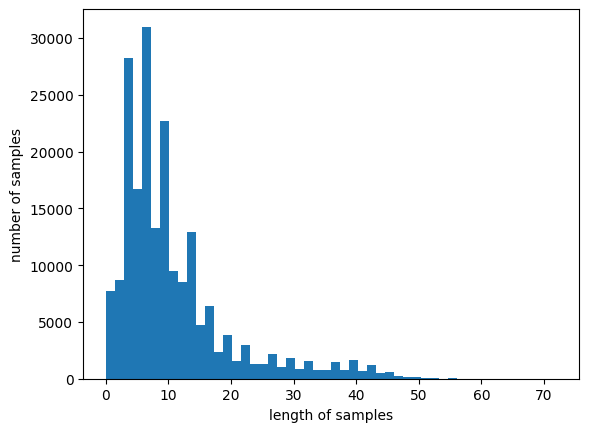

In [45]:
print('리뷰의 최대 길이 : ', max(len(review) for review in tokenized_data))
print('리뷰의 평균 길이 : ', sum(map(len, tokenized_data)) / len(tokenized_data))
plt.hist([len(review) for review in tokenized_data], bins = 50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [46]:
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [47]:
model.wv.vectors.shape

(16477, 100)

In [48]:
print(model.wv.most_similar('최민식'))

[('안성기', 0.8670523762702942), ('김명민', 0.8575130701065063), ('송강호', 0.8513278365135193), ('김갑수', 0.850092887878418), ('최민수', 0.8480435013771057), ('미스캐스팅', 0.8476690053939819), ('정재영', 0.8442845940589905), ('설경구', 0.8374086618423462), ('김승우', 0.835602343082428), ('서영희', 0.8298814296722412)]


In [49]:
print(model.wv.most_similar('히어로'))

[('슬래셔', 0.8828203082084656), ('호러', 0.8636288642883301), ('무협', 0.8461466431617737), ('느와르', 0.8412711024284363), ('물', 0.8329458832740784), ('정통', 0.8252924084663391), ('물의', 0.8125156164169312), ('블록버스터', 0.8068121671676636), ('무비', 0.7932773232460022), ('고어', 0.772662341594696)]
